<a href="https://colab.research.google.com/github/aswinp-kumar/diabetes-prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [196]:
import pandas as pd

data_df= pd.read_csv('/content/test_diabetes.csv',sep=';')

data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,Zero,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,0.0,Zero,30.1,0.349,47.0,1


In [197]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [198]:
data_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [199]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [200]:
data_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,731.000000,730.000000,734.000000,734.000000,733.000000,728.000000,717.000000
mean,3.824897,121.152055,69.008174,20.848774,31.979536,0.472702,34.108787
std,3.369400,31.774802,19.496036,15.876665,7.918709,0.331714,16.119730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,-1.000000
25%,1.000000,99.000000,64.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,36.500000,0.624500,41.000000
max,17.000000,198.000000,122.000000,99.000000,67.100000,2.420000,200.000000


In [201]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,731.0,3.824897,3.369400,0.000,1.000,3.0000,6.0000,17.00
Glucose,730.0,121.152055,31.774802,0.000,99.000,117.0000,141.0000,198.00
BloodPressure,734.0,69.008174,19.496036,0.000,64.000,72.0000,80.0000,122.00
SkinThickness,734.0,20.848774,15.876665,0.000,0.000,23.0000,32.0000,99.00
BMI,733.0,31.979536,7.918709,0.000,27.400,32.0000,36.5000,67.10
DiabetesPedigreeFunction,728.0,0.472702,0.331714,0.078,0.245,0.3725,0.6245,2.42
Age,717.0,34.108787,16.119730,-1.000,24.000,29.0000,41.0000,200.00


In [202]:
#checking null value

In [203]:
data_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False


In [204]:
data_df.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [205]:
#Duplicating the dataset
data_df_copy = data_df.copy(deep = True)

In [206]:
#replacing unwanted data with NaN

In [207]:
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace('Zero',np.NaN)
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace('0',np.NaN)
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace('Zero',np.NaN)
data_df_copy[['Outcome']] = data_df_copy[['Outcome']].replace('N',0)    
data_df_copy[['Outcome']] = data_df_copy[['Outcome']].replace('Y',1)


In [208]:
data_df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,NaN,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


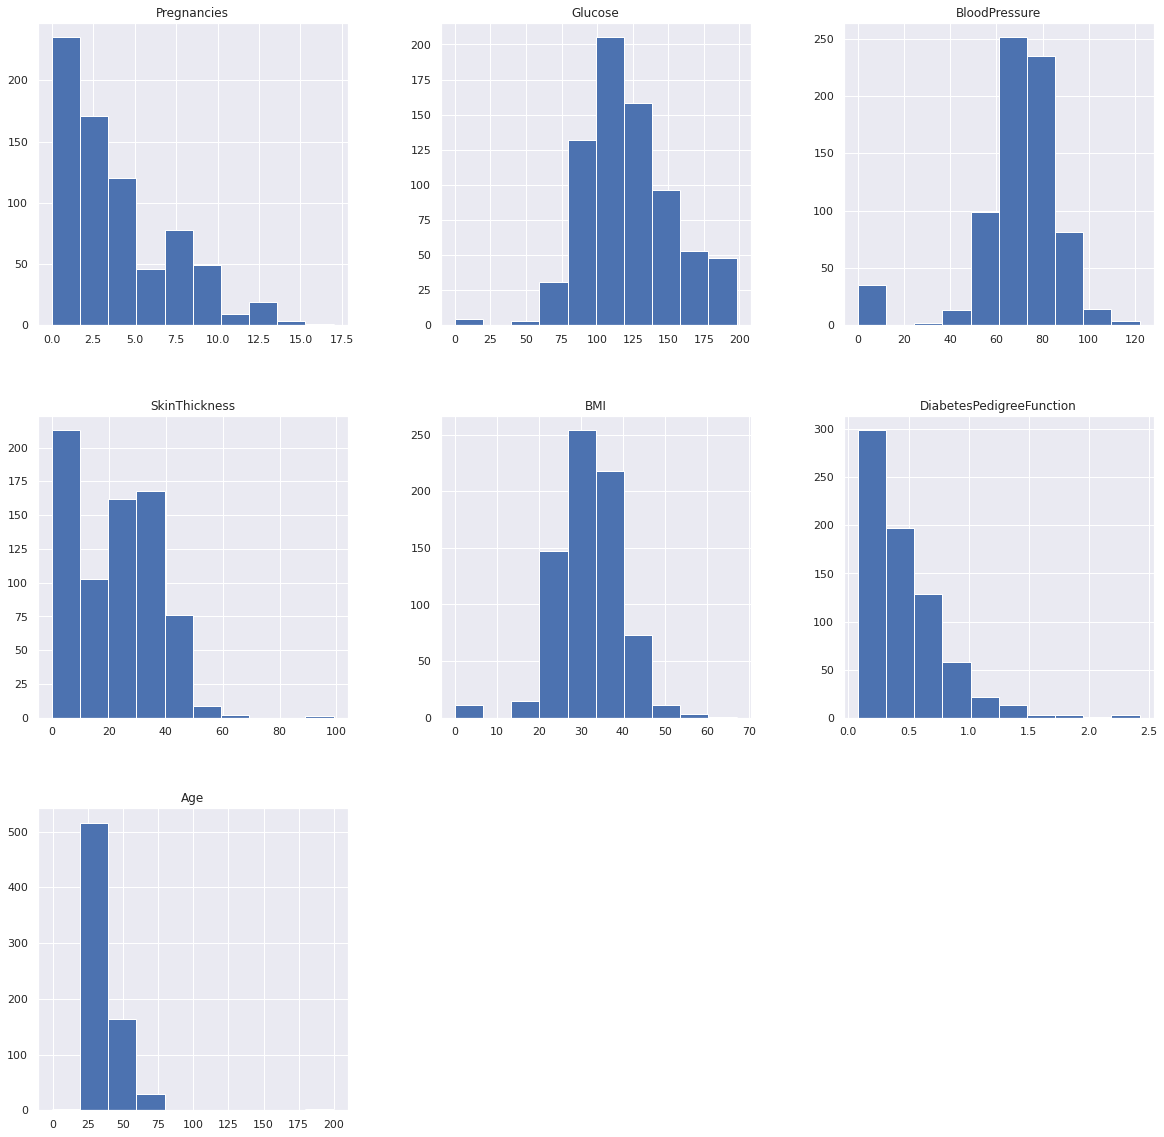

In [209]:
p = data_df.hist(figsize = (20,20))

In [210]:
print(data_df_copy.isnull().sum())


Pregnancies                 144
Glucose                      42
BloodPressure                69
SkinThickness               243
Insulin                     400
BMI                          46
DiabetesPedigreeFunction     40
Age                          51
Outcome                       0
dtype: int64


In [211]:
#removing null values

In [212]:
data_df_copy['Pregnancies'].fillna(data_df_copy['Pregnancies'].mean(), inplace = True)
data_df_copy['Glucose'].fillna(data_df_copy['Glucose'].mean(), inplace = True)
data_df_copy['BloodPressure'].fillna(data_df_copy['BloodPressure'].mean(), inplace = True)
data_df_copy['SkinThickness'].fillna(data_df_copy['SkinThickness'].median(), inplace = True)
data_df_copy['Insulin'].fillna(data_df_copy['Insulin'].median(), inplace = True)
data_df_copy['BMI'].fillna(data_df_copy['BMI'].median(),inplace = True)
data_df_copy['DiabetesPedigreeFunction'].fillna(data_df_copy['DiabetesPedigreeFunction'].mean(), inplace = True)
data_df_copy['Age'].fillna(data_df_copy['Age'].mean(), inplace = True)

In [213]:
print(data_df_copy.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [214]:
 #Plotting the data distribution plots  after removing null values



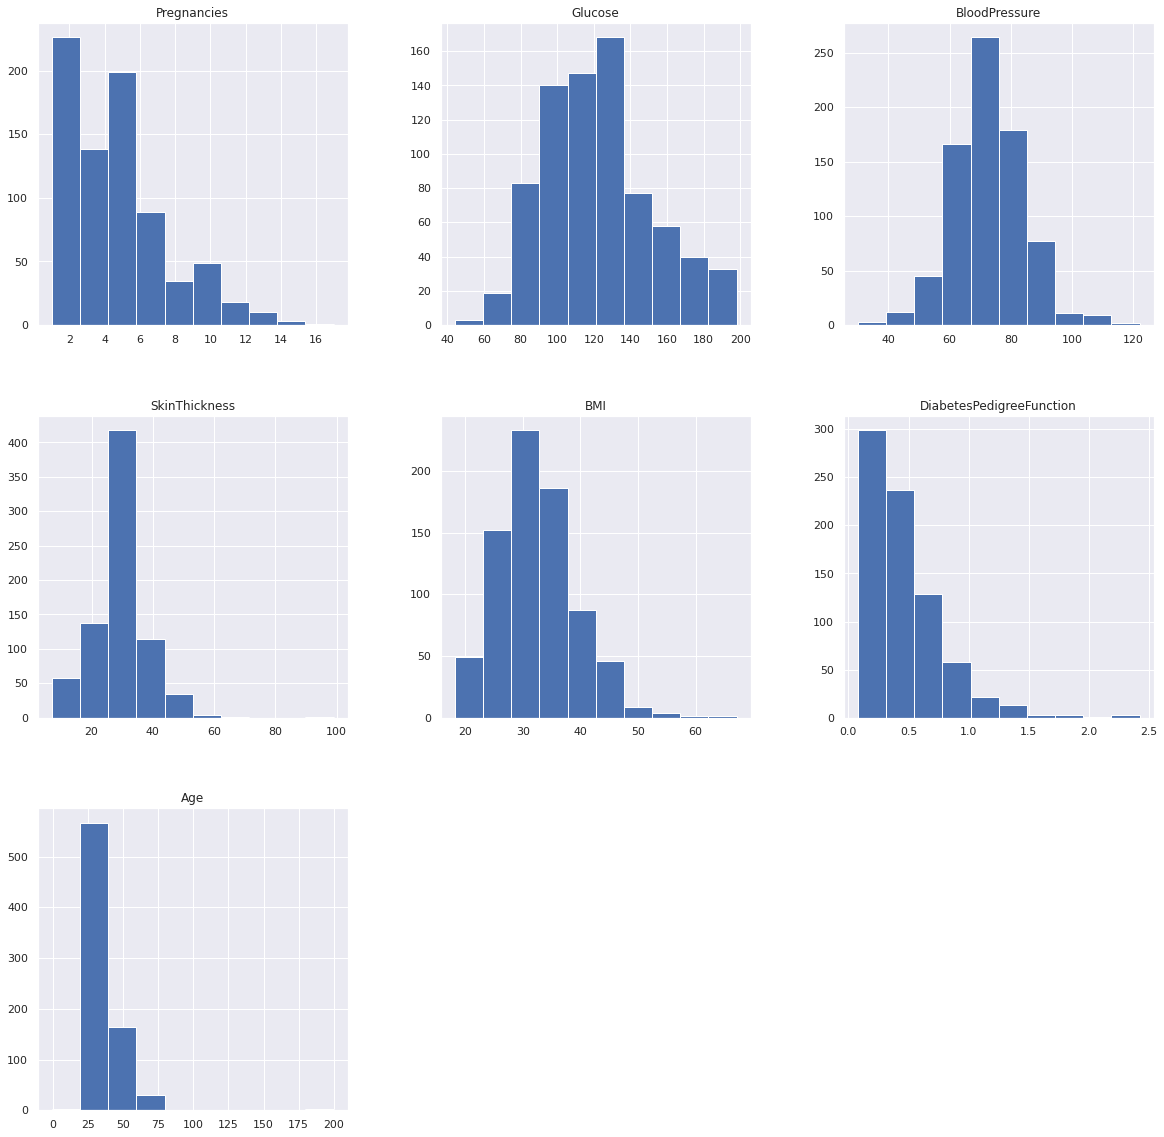

In [215]:
p = data_df_copy.hist(figsize = (20,20))

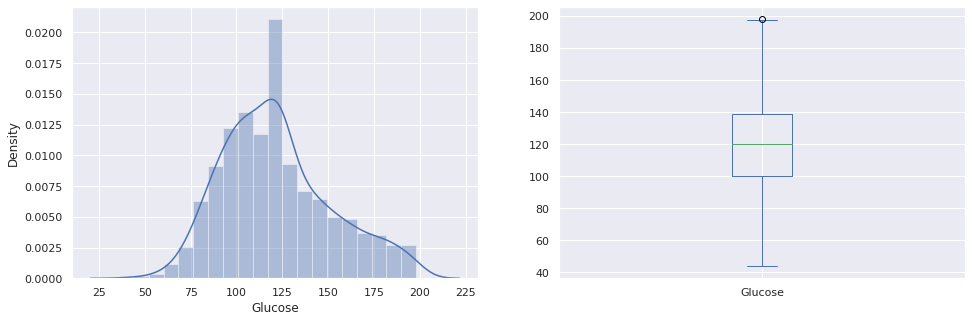

In [218]:
plt.subplot(121), sns.distplot(data_df_copy['Glucose'])
plt.subplot(122), data_df_copy['Glucose'].plot.box(figsize=(16,5))
plt.show()

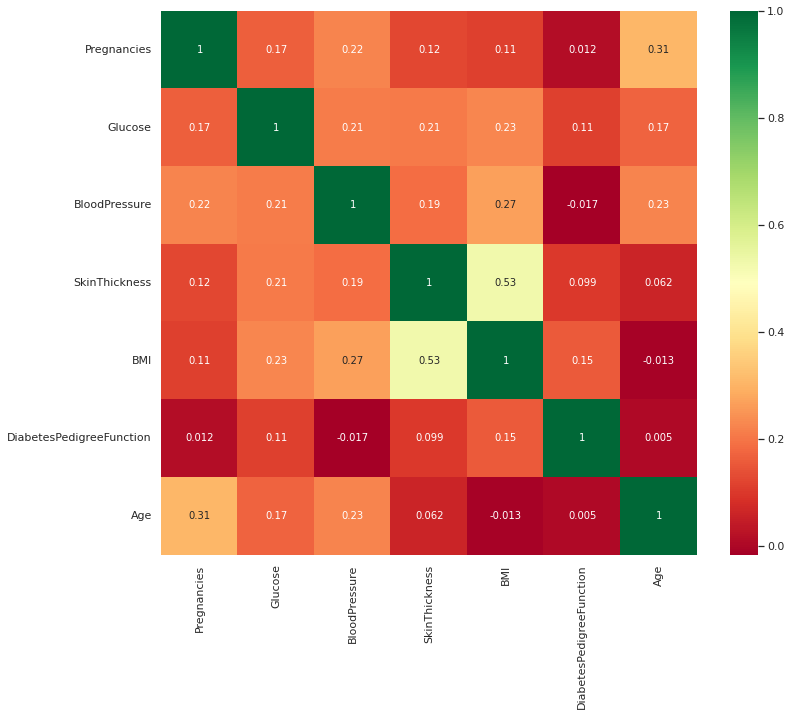

In [219]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data_df_copy.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
#Scaling

In [220]:
data_df_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.480769,148.000000,72.0,35.0,127.5,33.6,0.627,50.000000,1
1,1.000000,85.000000,66.0,29.0,127.5,26.6,0.351,31.000000,0
2,8.000000,183.000000,64.0,29.0,127.5,23.3,0.672,32.000000,1
3,1.000000,89.000000,66.0,23.0,94,28.1,0.167,21.000000,0
4,4.480769,121.819559,40.0,35.0,168,43.1,2.288,34.108787,1


In [221]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.881792,-0.039911,0.680160,-0.167659,0.170172,0.478090,1.020994
1,-1.200740,-1.240131,-0.556533,-0.011711,-0.167659,-0.874531,-0.377091,-0.199736
2,1.214008,2.060638,-0.728741,-0.011711,-0.167659,-1.367033,0.617522,-0.135487
3,-1.200740,-1.105406,-0.556533,-0.703583,-0.580990,-0.650666,-0.947212,-0.842226
4,0.000000,0.000000,-2.795231,0.680160,0.332040,1.587983,5.624671,0.000000


In [222]:
sc_y = StandardScaler()
y = pd.DataFrame(sc_y.fit_transform(data_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.881792,-0.039911,0.680160,-0.167659,0.170172,0.478090,1.020994
1,-1.200740,-1.240131,-0.556533,-0.011711,-0.167659,-0.874531,-0.377091,-0.199736
2,1.214008,2.060638,-0.728741,-0.011711,-0.167659,-1.367033,0.617522,-0.135487
3,-1.200740,-1.105406,-0.556533,-0.703583,-0.580990,-0.650666,-0.947212,-0.842226
4,0.000000,0.000000,-2.795231,0.680160,0.332040,1.587983,5.624671,0.000000


In [223]:
y = data_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: object

In [ ]:
#Building model
#random forest

In [235]:
from sklearn.model_selection import train_test_split

X = data_df_copy.drop(columns = 'Outcome')
y = data_df_copy['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)


In [247]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)

In [248]:
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [250]:
from sklearn import metrics

predictions = rfc.predict(X_test)

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7322834645669292


In [251]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[136  26]
 [ 42  50]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       162
           1       0.66      0.54      0.60        92

    accuracy                           0.73       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.73      0.73      0.73       254



In [ ]:
#decision tree

In [252]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [253]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6653543307086615


In [254]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[116  46]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       162
           1       0.54      0.58      0.55        92

    accuracy                           0.67       254
   macro avg       0.64      0.65      0.64       254
weighted avg       0.67      0.67      0.67       254



In [ ]:
#svm

In [258]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [259]:
svc_pred = svc_model.predict(X_test)


In [260]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7283464566929134


In [261]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))


[[144  18]
 [ 51  41]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       162
           1       0.69      0.45      0.54        92

    accuracy                           0.73       254
   macro avg       0.72      0.67      0.67       254
weighted avg       0.72      0.73      0.71       254



In [263]:
#CONCLUSION
#Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.73.

In [268]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [270]:
data_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.480769,148.000000,72.0,35.0,127.5,33.6,0.627,50.000000,1
1,1.000000,85.000000,66.0,29.0,127.5,26.6,0.351,31.000000,0
2,8.000000,183.000000,64.0,29.0,127.5,23.3,0.672,32.000000,1
3,1.000000,89.000000,66.0,23.0,94,28.1,0.167,21.000000,0
4,4.480769,121.819559,40.0,35.0,168,43.1,2.288,34.108787,1


In [272]:
#Predicting Patient 4
rfc.predict([[4.480769,121.819559,40,35,168,43.1,2.228,34.108787]])
#Patient 4 has diabetes

array([1])

In [273]:
#Predicting Patient 2
rfc.predict([[1.000000,85,66,29,127.5,26.6,0.351,31]])
#Patient 2 don't have diabetes

array([0])